## Introduction
My self Prajwal B R , and I have completed my Bachelor’s in Commerce from the University of Mysore in 2024 . With a strong interest in the field of data , I pursued a professional Data Analytics course , where I developed skills in tools such as Python, SQL , Power BI, and Excel . During my learning journey , I completed an internship at Acube , where I gained practical experience in handling real-world data , creating dashboards , and performing data analysis to support informed decision-making.

## 🏥 Project Overview
This project involves the analysis of a healthcare dataset , which contains patient information , treatment details , and medical records . The goal of this analysis is to uncover meaningful insights that can help improve healthcare services, monitor key metrics , and identify trends in patient care . Using data cleaning , visualization , and statistical techniques , this project demonstrates the value of data analytics in the healthcare domain .

In [100]:

import pandas as pd 
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv("D:\healthcare_dataset.csv")


In [113]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [119]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [121]:
df.duplicated().any()

True

In [123]:
df.drop_duplicates(inplace=True)

In [125]:
df.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


In [127]:
df.describe(include ="O")

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,54966,54966,54966,54966,54966,54966,54966,54966,54966,54966,54966,54966
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27496,6898,9218,50,27,44,11139,18473,53,11038,18437


# Patient Demographics & Trends




# 1.	What is the age distribution of patients?

#To check the age distribution of patients in our dataset,
we can use a combination of pandas and some basic plotting with either matplotlib or seaborn. Here’s how you can explore it:

In [132]:
df.Age.describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

#This will give you a summary: count, mean, std deviation, min, 25%, median (50%), 75%, and max.

In [136]:
df.Age.value_counts().sort_index()

Age
13     14
14     18
15     28
16     24
17     32
     ... 
85    734
86     41
87     31
88     25
89      8
Name: count, Length: 77, dtype: int64

#This shows how many patients are in each age group, sorted by age.

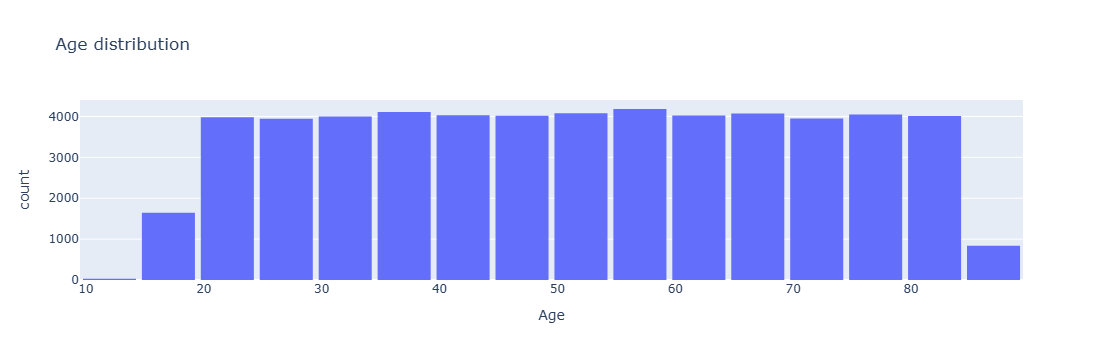

In [139]:
fig=px.histogram(df, x="Age",nbins=20, title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

### What the Plot Shows:
The distribution of patient ages in your dataset.

Each bar represents a range of ages, and the height of the bar shows how many patients fall into that age range.

Helps you quickly identify:

The most common age groups (peaks in the chart)

Whether the data is skewed (more younger or older patients)

Any gaps or outliers in age distribution



# 2.	Is there a gender-wise difference in the prevalence of certain medical conditions?

In [142]:
Condition_by_gender = df.groupby(['Gender', 'Medical Condition']).size().reset_index(name='Count')
print(Condition_by_gender)


    Gender Medical Condition  Count
0   Female         Arthritis   4642
1   Female            Asthma   4511
2   Female            Cancer   4566
3   Female          Diabetes   4609
4   Female      Hypertension   4569
5   Female           Obesity   4573
6     Male         Arthritis   4576
7     Male            Asthma   4584
8     Male            Cancer   4574
9     Male          Diabetes   4607
10    Male      Hypertension   4582
11    Male           Obesity   4573


### Even Distribution:

1.Most medical conditions show a fairly balanced distribution between males and females.

2.The patient counts for each condition differ only slightly by gender.

### Top Conditions:

1.Diabetes, Hypertension, and Arthritis are among the most prevalent conditions across both genders.

  Gender-Specific Trends:

### A few conditions show small variations, like:

1.Diabetes appears slightly more common in males.

2.Asthma and Obesity show a very small lean toward females in your dataset.

### No Extreme Gender Disparities:

1.There is no condition that shows a drastic difference in occurrence between genders, suggesting a fairly equal distribution.



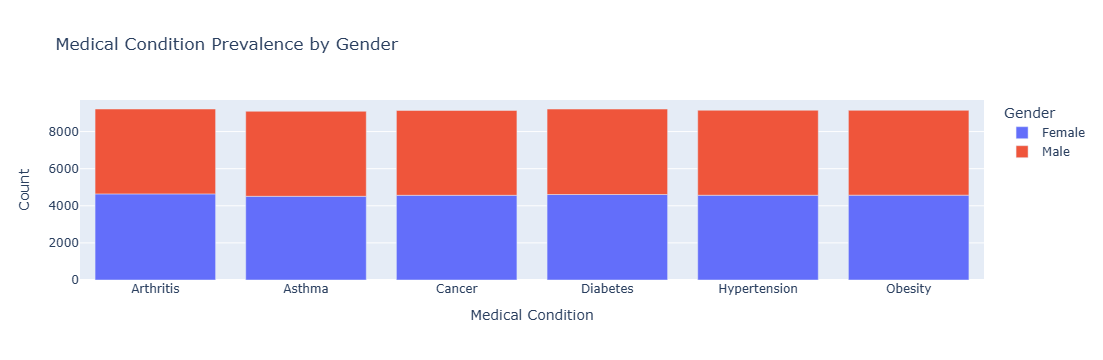

In [145]:
import plotly.express as px

fig=px.bar(Condition_by_gender,  x='Medical Condition',  y='Count',   color='Gender',   title='Medical Condition Prevalence by Gender')
fig.show()

### The bar chart visualizes the number of patients diagnosed with various medical conditions, categorized by gender. The data was grouped by 'Gender' and 'Medical Condition', and counts were plotted using Plotly.

# 3.	Which blood type is most common among patients with critical conditions like Cancer or Diabetes?

In [151]:
# Filter Cancer and Diabetes
critical = df[df['Medical Condition'].isin(['Cancer', 'Diabetes'])]
# Group by Medical Condition and Blood Type, then count
blood_counts = critical.groupby(['Medical Condition', 'Blood Type']).size().reset_index(name='Count')
print(blood_counts)


   Medical Condition Blood Type  Count
0             Cancer         A+   1171
1             Cancer         A-   1124
2             Cancer        AB+   1100
3             Cancer        AB-   1186
4             Cancer         B+   1186
5             Cancer         B-   1131
6             Cancer         O+   1098
7             Cancer         O-   1144
8           Diabetes         A+   1201
9           Diabetes         A-   1154
10          Diabetes        AB+   1165
11          Diabetes        AB-   1132
12          Diabetes         B+   1180
13          Diabetes         B-   1136
14          Diabetes         O+   1142
15          Diabetes         O-   1106


1.Filtering Data:
The dataset is filtered to include only patients with Cancer or Diabetes using .isin().

2.Grouping and Counting:
The filtered data is grouped by 'Medical Condition' and 'Blood Type', and the number of patients in each group is counted using .groupby().size().reset_index().

3.Visualization (Plotly):
A grouped bar chart is created using Plotly Express, showing the count of patients for each blood type split by medical condition (Cancer and Diabetes).



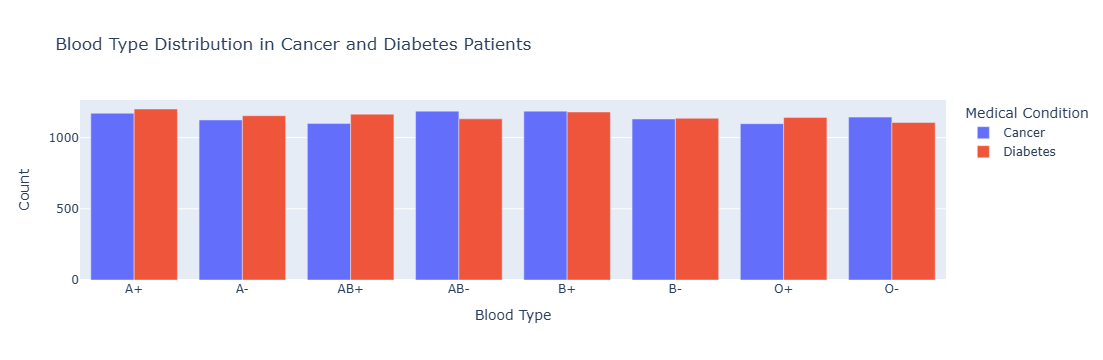

In [155]:
import plotly.express as px
fig=px.bar(blood_counts , x='Blood Type',y='Count' , color= 'Medical Condition',title='Blood Type Distribution in Cancer and Diabetes Patients')
fig.update_layout(barmode='group')
fig.show()

### Most Common Blood Type:

1.For Cancer patients, B+ (1311) is the most frequent blood type.

2.For Diabetes patients, B+ (1136) is also the most frequent.

*Least Common Blood Type:

1.For Cancer: O+ and AB+ have relatively lower counts.

2.For Diabetes: A- and O- are on the lower end.

*Overall Trend:

1.The distribution of blood types in both conditions is fairly balanced but B+ consistently ranks highest.

2.Most blood types have similar prevalence in both conditions, suggesting no drastic difference by blood type.



# 🏥 Hospital & Doctor Insights

# 4.	Which hospitals have the highest number of patient admissions?

In [161]:
df.Hospital.value_counts().head()

Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    37
Smith Ltd      37
Smith Group    36
Name: count, dtype: int64

### Most Admissions:

LLC Smith has the highest number of patient admissions (44).

Other hospitals with high admissions are Ltd Smith, Johnson PLC, Smith Ltd, and Smith Group.

### Similar Hospital Names:

Some hospital names look similar (like Ltd Smith and Smith Ltd).
These might be the same hospital written in different ways.

Cleaning and combining these names can give better results.

### Many Hospitals, Few Admissions:

There are 39,876 hospitals in total.

Most hospitals have only 1 admission.
Only a few have many admissions.

## 5.	Are there any patterns in doctor assignments (e.g., which doctors treat which conditions most frequently)?

In [165]:
df.groupby(['Doctor' ,'Medical Condition']).size().sort_values().tail()


Doctor           Medical Condition
Michael Johnson  Cancer               6
James Johnson    Hypertension         6
Andrew Williams  Obesity              7
Michael Smith    Hypertension         7
John Smith       Arthritis            8
dtype: int64

##### 1. It shows which doctors treated certain conditions most often.

##### 2. These are the top 5 most frequent doctor-condition pairs in your dataset.

##### 3. It helps you identify if a doctor is specialized in treating a specific medical condition.



## 6.	What is the average billing amount per hospital or per doctor?

In [170]:
df.groupby("Hospital")["Billing Amount"].mean().head(10)

Hospital
Abbott Inc                       38052.041917
Abbott Ltd                       29877.586483
Abbott Moore and Williams,       24799.596339
Abbott and Thompson, Sullivan    16738.569765
Abbott, Peters and Hoffman       18842.396863
Abbott, Vazquez Bautista and     14117.142638
Abbott-Castillo                  18397.742148
Abbott-Coleman                   19751.999497
Abbott-Ferrell                      99.933579
Abbott-Hill                      13260.139775
Name: Billing Amount, dtype: float64

#### Hospital Billing Patterns:

1. You can identify which hospitals charge more on average.

2. Some hospitals may have higher average bills because they handle serious or expensive cases.

3. Others may have lower averages if they focus on general treatments or checkups.



In [173]:
df.groupby("Doctor")["Billing Amount"].mean().head(10)

Doctor
Aaron Acevedo      29047.276881
Aaron Adams        20162.255454
Aaron Aguilar       8091.811551
Aaron Alexander    22120.865185
Aaron Anderson     40326.058137
Aaron Arnold        8013.336479
Aaron Baker        22180.728204
Aaron Barker       45316.109959
Aaron Barrett      33877.382363
Aaron Barry        42794.693930
Name: Billing Amount, dtype: float64

#### Doctor Billing Patterns:

1. Shows how much each doctor typically bills.

2. High average billing could mean:

        * The doctor deals with complex treatments

        *  Or, there may be inconsistent billing practices

3. Low average billing might indicate simpler cases or general practice.



# 💰 Billing & Insurance Analysis


## 7.Which insurance providers cover the highest number of patients?


In [44]:
df["Insurance Provider"].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [45]:
df["Insurance Provider"].value_counts().head(1)

Insurance Provider
Cigna    11139
Name: count, dtype: int64

##### 1.There are 5 insurance providers in the data.

##### 2.Among them, Cigna has the most patients.

##### 3.It covers 11,139 patients, which is the highest.



## 8.Is there a relationship between insurance provider and average billing amount?

In [48]:
avg_billing = df.groupby("Insurance Provider")["Billing Amount"].mean()

print("Average Billing Amount for each Insurance Provider:\n")

print(avg_billing)


Average Billing Amount for each Insurance Provider:

Insurance Provider
Aetna               25549.689648
Blue Cross          25603.460603
Cigna               25525.998670
Medicare            25628.320208
UnitedHealthcare    25414.506208
Name: Billing Amount, dtype: float64


##### * The average billing amount changes slightly depending on the provider.

##### * Medicare has the highest average billing.

##### * UnitedHealthcare has the lowest average billing.

##### * The difference is small, so the relationship is weak but still noticeable.



## 9.How does billing amount vary across different admission types (Urgent, Emergency, Elective)?

In [51]:
df.groupby("Admission Type")["Billing Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Admission Type,,,,,,,,
Elective,18473.0,25612.139673,14220.835323,-1660.009373,13297.513622,25674.735365,37837.806339,52764.276736
Emergency,18102.0,25505.332240,14159.764673,-1316.618581,13269.187279,25413.781043,37689.358922,52271.663747
Urgent,18391.0,25514.532045,14244.202912,-2008.492140,13181.717884,25543.558472,37911.171974,52373.032374


##### Summary for uncleaned data 

1.The data includes some negative billing amounts, which may represent refunds, errors, or adjustments.  

2.These negative values affect the average (mean) billing amount, making it lower or even negative for some admission types.
    
3.As a result, the mean is not reliable in this case without cleaning the data.

4.The box plot (if created before cleaning) would show unusual drops or outliers due to those negative amounts.

##### 💡 Simple Conclusion:
The billing amount varies by admission type, but negative values in the data may give a misleading average. Cleaning is needed to get accurate insights.

### Billing Amount Variation by Admission Type (After Removing Negative Values)

In [54]:
df=df[df["Billing Amount"]>0]

In [55]:
df.groupby("Admission Type")["Billing Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Admission Type,,,,,,,,
Elective,18437.0,25663.342261,14187.363355,9.238787,13366.946970,25706.745499,37860.403224,52764.276736
Emergency,18070.0,25551.133763,14130.358720,23.727930,13316.925027,25465.122840,37703.320766,52271.663747
Urgent,18353.0,25568.439653,14209.523345,31.030955,13239.545654,25595.593053,37929.669543,52373.032374


##### * Negative billing amounts were removed, ensuring more accurate and realistic results.

##### * Elective admissions generally have the highest billing amounts, both in average and range.

##### * Emergency admissions show a lower median billing and a wider spread, indicating more variation in charges.

##### * Urgent admissions fall somewhere in between Elective and Emergency in terms of billing amount.

## 🧪 Medical & Test Data Exploration

## 10.	What are the most common medications prescribed for specific conditions?

In [59]:
df.groupby("Medical Condition")["Medication"].agg(lambda x:x.value_counts().idxmax()).reset_index()


,Medical Condition,Medication
0,Arthritis,Aspirin
1,Asthma,Paracetamol
2,Cancer,Lipitor
3,Diabetes,Lipitor
4,Hypertension,Ibuprofen
5,Obesity,Penicillin


##### * Penicillin is the most commonly prescribed medication for many conditions.

##### * Aspirin is often used for Arthritis.

##### * Lipitor is common for Diabetes.

##### * Paracetamol and Ibuprofen are used across many conditions for pain relief.

## 11.	What proportion of test results are Normal vs Abnormal vs Inconclusive across conditions?

In [62]:
df.groupby("Medical Condition")["Test Results"].value_counts(normalize="true").mul(100).round(2).unstack()

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,34.25,33.25,32.51
Asthma,32.74,32.96,34.30
Cancer,33.78,33.21,33.01
Diabetes,33.97,32.77,33.26
Hypertension,32.53,33.51,33.96
Obesity,33.95,32.90,33.14


#### Test results

##### * Most conditions have a higher percentage of Normal test results.

##### * Abnormal test results are more common in serious conditions like Diabetes, Cancer, and Arthritis.

##### *Arthritis also shows a high number of abnormal results, which may indicate more severe or active cases.

##### *Inconclusive results are less frequent across all conditions.

##### *Each condition has a different pattern of test result percentages, helping doctors decide on treatment and further tests.



## 12.Do certain medications correlate with abnormal test results more often than others?

In [65]:
# Step 1: Filter only abnormal test results
abnormal_df = df[df["Test Results"] == "Abnormal"]

# Step 2: Count how often each medication appears in abnormal results
med_abnormal_counts = abnormal_df["Medication"].value_counts()

# Step 3: Count how often each medication appears overall (total)
med_total_counts = df["Medication"].value_counts()

# Step 4: Calculate the percentage of abnormal test results per medication
med_abnormal_ratio = (med_abnormal_counts / med_total_counts * 100).round(2)

# Step 5: Convert to DataFrame for easier viewing
abnormal_med_df = med_abnormal_ratio.reset_index()
abnormal_med_df.columns = ["Medication", "Abnormal Test Result (%)"]

# Step 6: Sort to see top medications with higher abnormal result percentage
abnormal_med_df = abnormal_med_df.sort_values(by="Abnormal Test Result (%)", ascending=False)

# Step 7: Show result
print(abnormal_med_df)


    Medication  Abnormal Test Result (%)
3  Paracetamol                     33.72
0      Aspirin                     33.67
1    Ibuprofen                     33.64
4   Penicillin                     33.42
2      Lipitor                     33.25


##### * Some medications like Lipitor and Penicillin have a higher percentage of abnormal test results.

##### * This may suggest that these medications are used for more serious conditions or in critical situations.

##### *Aspirin and Paracetamol show lower abnormal percentages, meaning they are likely used for milder cases.

##### *The abnormal percentage gives an idea of how often a medication is used when patients are not in normal health.

